<a href="https://colab.research.google.com/github/ErBadi/Mango-price-evolution-US/blob/main/Final_Mangos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning and EDA

In [ ]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [ ]:
# Reading files into variables
df17_19 = pd.read_csv('mango17-19.csv', parse_dates = ["Date"], decimal = ',')
df20 = pd.read_json('mango2020.json')

In [ ]:
# Checking files
df17_19.head(3)

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
0,0,2017-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2017,Albany,0.715,45929.18
1,1,2017-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2017,Albany,0.725,39785.81
2,2,2017-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2017,Albany,0.515,60883.41


In [ ]:
# Checking files
df20.head(3)

,ID,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
0,0,2020-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2020,Albany,0.935,139685.72750
1,1,2020-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2020,Albany,0.825,86876.33625
2,2,2020-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2020,Albany,0.710,102700.61250


In [ ]:
# Deleting TotalUS region from dataframe 
mask = df17_19["region"] != "TotalUS"
df17_19 = df17_19[mask]
mask = df20['region'] != 'TotalUS'
df20 = df20[mask]

In [ ]:
# Deleting all year 2020 from df17_19
mask = df17_19["year"] != 2020
df17_19 = df17_19[mask]

In [ ]:
# Dropping ID column since it's useless here
df17_19.drop('ID', axis = 1, inplace = True)
df20.drop('ID', axis = 1, inplace = True)

In [ ]:
# Converting dates to datetime to easily operate with them
df20['Date'] = pd.to_datetime(df20['Date']) 
df17_19['Date'] = pd.to_datetime(df17_19['Date'])

In [ ]:
# Sorting values by dates to see them better
df17_19.sort_values(by = "Date", inplace=True)
df20.sort_values(by = "Date", inplace = True)

# Questions


## Are prices higher in 2019 or in 2020?

In [ ]:
#Creating a Data Frame for the year 2019
df19 = df17_19[df17_19['year'] == 2019]
df19.head()

,Date,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,type,year,region,Profitability per unit,Total profitability
16860,2019-01-01,1.51,3969.98,212.55,2337.72,0.00,1419.71,1257.08,162.63,0.0,organic,2019,Roanoke,0.955,3791.33
16436,2019-01-01,1.28,5686.95,558.15,26.59,0.00,5102.21,2530.00,2572.21,0.0,organic,2019,Orlando,0.840,4777.04
16489,2019-01-01,1.98,8600.66,1221.92,3644.99,5.08,3728.67,3703.42,25.25,0.0,organic,2019,Philadelphia,1.190,10234.79
16542,2019-01-01,1.88,7740.98,2155.99,3030.64,1.20,2553.15,2547.83,5.32,0.0,organic,2019,PhoenixTucson,1.140,8824.72
16595,2019-01-01,1.50,9725.08,953.37,23.92,0.00,8747.79,8432.66,315.13,0.0,organic,2019,Pittsburgh,0.950,9238.83


In [ ]:
#Exploring dates
df19['Date'].max()

Timestamp('2019-12-31 00:00:00')

In [ ]:
df20['Date'].min()

Timestamp('2020-01-07 00:00:00')

In [ ]:
df20['Date'].max()

Timestamp('2020-03-25 00:00:00')

In [ ]:
#Getting 2019 dates that correspond with the ones from 2020
df19['Date'] > '2019-01-07'

16860    False
16436    False
16489    False
16542    False
16595    False
         ...  
7736      True
17497     True
17020     True
6093      True
16649     True
Name: Date, Length: 5616, dtype: bool

In [ ]:
df19 = df19.loc[(df19['Date'] >= '2019-01-07') & (df19['Date'] <= '2019-03-25')]

In [ ]:
df19.describe()

,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,1166.000000,1.166000e+03,1.166000e+03,1.166000e+03,1166.000000,1.166000e+03,1.166000e+03,1.166000e+03,1166.00000,1166.0,1166.000000,1.166000e+03
mean,1.449365,5.549690e+05,1.816875e+05,1.754589e+05,11313.006964,1.865085e+05,1.412486e+05,4.292497e+04,2334.83994,2019.0,0.960103,4.340675e+05
std,0.448275,1.248510e+06,5.091063e+05,4.096563e+05,36958.432310,4.270570e+05,3.309847e+05,1.246251e+05,8658.96271,0.0,0.360348,9.599666e+05
min,0.490000,1.336090e+03,0.000000e+00,0.000000e+00,0.000000,1.890200e+02,0.000000e+00,0.000000e+00,0.00000,2019.0,0.315000,1.359680e+03
25%,1.140000,1.269463e+04,8.005800e+02,3.277287e+03,0.000000,7.344305e+03,4.832208e+03,4.887950e+02,0.00000,2019.0,0.710000,1.386328e+04
50%,1.420000,1.164532e+05,8.808730e+03,3.016779e+04,139.965000,5.039115e+04,3.368659e+04,3.914475e+03,0.00000,2019.0,0.890000,1.037188e+05
75%,1.720000,4.038256e+05,1.072576e+05,1.268153e+05,3890.247500,1.236958e+05,8.831358e+04,2.823822e+04,234.43250,2019.0,1.095000,3.359710e+05
max,3.000000,8.153340e+06,4.335593e+06,3.425748e+06,368973.250000,3.311552e+06,2.504422e+06,1.227429e+06,95590.06000,2019.0,2.445000,7.786603e+06


In [ ]:
df20.describe()

,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1272.0,1272.000000,1.272000e+03
mean,2.652020,6.753979e+05,2.223233e+05,2.017356e+05,11320.677044,2.400134e+05,1.764768e+05,6.005600e+04,3480.519096,2020.0,0.842543,4.629353e+05
std,46.507302,1.495259e+06,5.943151e+05,5.038211e+05,45130.032397,5.260355e+05,3.869834e+05,1.954194e+05,12530.354452,0.0,0.178474,9.791398e+05
min,0.560000,2.064900e+03,0.000000e+00,6.600000e+00,0.000000,9.884500e+02,2.844300e+02,0.000000e+00,0.000000,2020.0,0.430000,2.054575e+03
25%,1.140000,1.748087e+04,7.633050e+02,2.702135e+03,0.000000,1.143816e+04,8.870212e+03,4.716925e+02,0.000000,2020.0,0.705000,1.718836e+04
50%,1.345000,1.446565e+05,1.311699e+04,2.640124e+04,164.825000,6.733826e+04,4.358257e+04,7.981460e+03,0.000000,2020.0,0.840000,1.180863e+05
75%,1.560000,5.029578e+05,1.111254e+05,1.335941e+05,4019.762500,1.656469e+05,1.196995e+05,3.629093e+04,780.762500,2020.0,0.975000,3.781061e+05
max,1660.000000,1.089468e+07,4.772922e+06,5.402444e+06,667141.610000,4.014132e+06,3.398570e+06,2.838239e+06,131300.760000,2020.0,1.325000,5.992073e+06


In [ ]:
# Since std was very high and there was a unusual max number in Average Price, we assume it's an 
#error and delete it
df20 = df20.loc[df20['AveragePrice'] != 1660]
df20.describe()

,AveragePrice,Total Volume,Type1,Type2,Type3,Type 4,Small Bags,Large Bags,XLarge Bags,year,Profitability per unit,Total profitability
count,1271.000000,1.271000e+03,1.271000e+03,1.271000e+03,1271.000000,1.271000e+03,1.271000e+03,1.271000e+03,1271.000000,1271.0,1271.000000,1.271000e+03
mean,1.348049,6.759047e+05,2.224968e+05,2.018879e+05,11329.583950,2.401854e+05,1.766143e+05,6.008776e+04,3483.252895,2020.0,0.842317,4.632717e+05
std,0.306690,1.495738e+06,5.945168e+05,5.039901e+05,45146.678168,5.262068e+05,3.871047e+05,1.954930e+05,12534.907198,0.0,0.178362,9.794517e+05
min,0.560000,2.064900e+03,0.000000e+00,6.600000e+00,0.000000,9.884500e+02,2.844300e+02,0.000000e+00,0.000000,2020.0,0.430000,2.054575e+03
25%,1.140000,1.747216e+04,7.627100e+02,2.699790e+03,0.000000,1.139148e+04,8.921800e+03,4.669850e+02,0.000000,2020.0,0.705000,1.713154e+04
50%,1.340000,1.446643e+05,1.319630e+04,2.644643e+04,166.920000,6.734254e+04,4.372270e+04,7.969750e+03,0.000000,2020.0,0.840000,1.182675e+05
75%,1.560000,5.030644e+05,1.114912e+05,1.340606e+05,4028.315000,1.657865e+05,1.197040e+05,3.636368e+04,781.065000,2020.0,0.975000,3.781969e+05
max,2.300000,1.089468e+07,4.772922e+06,5.402444e+06,667141.610000,4.014132e+06,3.398570e+06,2.838239e+06,131300.760000,2020.0,1.325000,5.992073e+06


At this point, everything looks fine in our data set, after some cleaning and exploratory analysis.

In [ ]:
# Using a conditional statement to display data, so that if in some months with 
#new 2020 data, things change, the display changes too
m19 = round(np.mean(df19['AveragePrice']),2) #Just finding the mean of prices in each year
m20 = round(np.mean(df20['AveragePrice']),2)
diff = round((m20 - m19),2)
if m20 > m19:
  print("2019 average prices mean is ",m19,"$ while 2020 mean is ",m20, "$ so, 2020 prices are, on average,",diff, "$ higher than those in our time interval in 2020")
else:
  diff = diff*(-1)
  print("2019 average prices mean is ",m19,"$ while 2020 mean is ",m20, "$ so, 2019 prices are, on average,",diff, "$ higher than those in our time interval than 2020")

2019 average prices mean is  1.45 $ while 2020 mean is  1.35 $ so, 2019 prices are, on average, 0.1 $ higher than those in our time interval than 2020


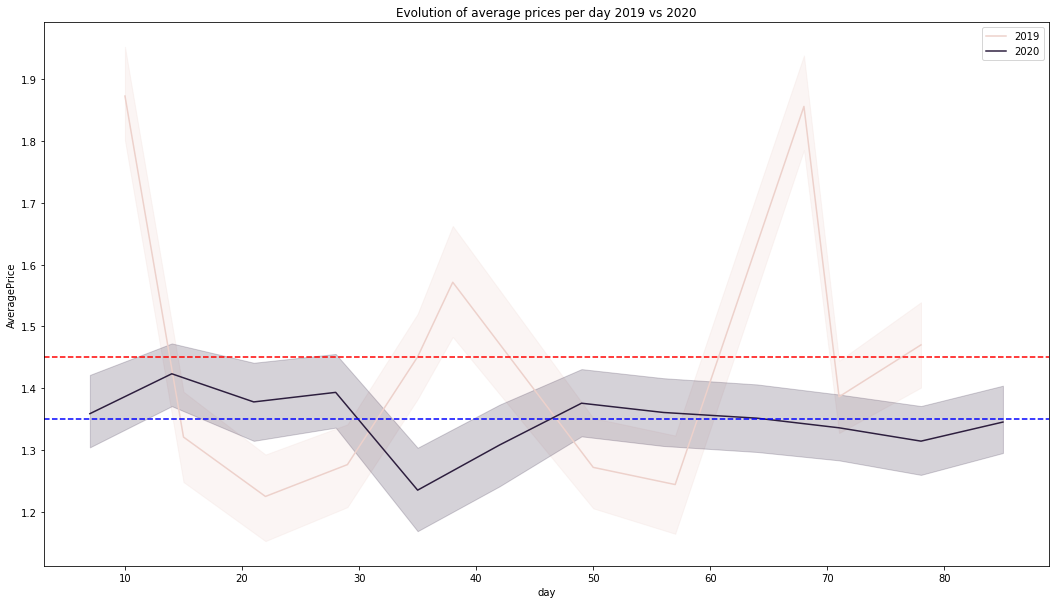

In [ ]:
# Plotting prices per day
df_plot = df19.append(df20,sort = True)
df_plot['day'] = pd.DatetimeIndex(df_plot['Date']).dayofyear
plt.figure(figsize=(18,10))
plt.title('Evolution of average prices per day 2019 vs 2020')
sns.lineplot(x='day', y='AveragePrice', hue = 'year', data = df_plot)
plt.axhline(m19, color='r', linestyle='--')
plt.axhline(m20, color='b', linestyle='--')
plt.legend()

From this first plot, we can see a comparison between the prices evolution per day in both 2019 and 2020. Means are shown in red line for 2019 and blue line for 2020. We can clearly see that prices are higher in 2019.

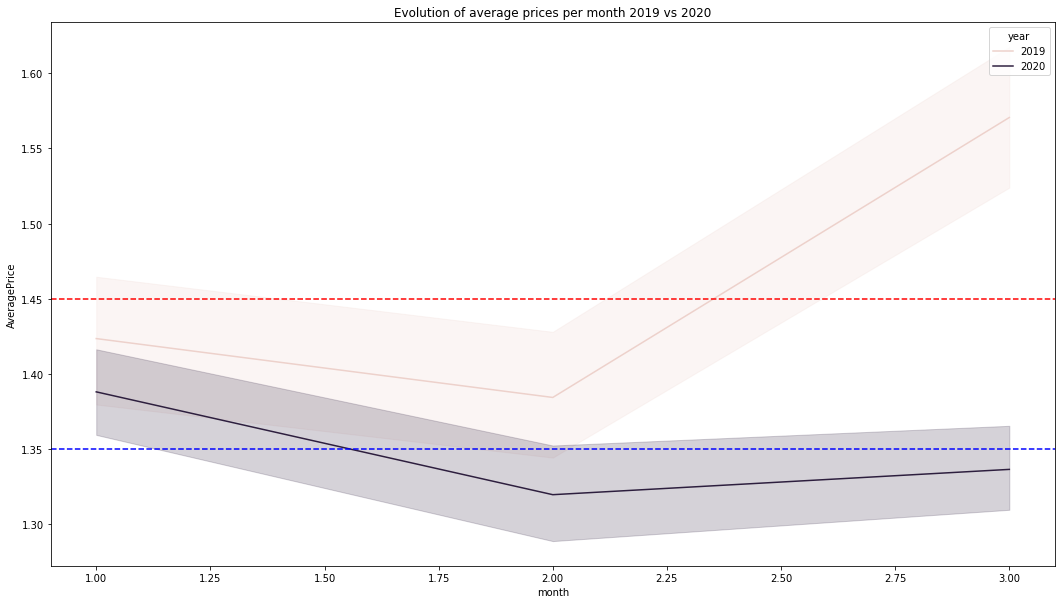

In [ ]:
df_plot['month'] = pd.DatetimeIndex(df_plot['Date']).month
plt.figure(figsize=(18,10))
plt.title('Evolution of average prices per month 2019 vs 2020')
sns.lineplot(x='month', y='AveragePrice', hue = 'year', data = df_plot)
plt.axhline(m19, color='r', linestyle='--')
plt.axhline(m20, color='b', linestyle='--')

This plot shows the average prices between months for both years. Here we clearly see how 2019 is on average higher than 2020 prices for the first 3 months of the year.

## Are prices higher depending on the type of mango?

In [ ]:
# Creating a Data Frame with all the data from 2019 and 2020
df_total = df17_19.append(df20,sort = "True")
# Creating a reduced data frame with that same data but for the first 3 months of each year so we can properly compare
mask = ((df_total['Date'] >= '2017-01-01') & (df_total['Date'] <= '2017-04-01')) | ((df_total['Date'] >= '2018-01-01') & (df_total['Date'] <= '2018-04-01')) | ((df_total['Date'] >= '2019-01-01') & (df_total['Date'] <= '2019-04-01')) | ((df_total['Date'] >= '2020-01-01') & (df_total['Date'] <= '2020-04-01'))
df_totalr = df_total.loc[mask]

In [ ]:
# Creating data frames for each type of mango
df_org = df_totalr[df_totalr['type'] == "organic"]
df_con = df_totalr[df_totalr['type'] == "conventional"]
# Getting its means
morg = df_org['AveragePrice'].mean()
mcon = df_con['AveragePrice'].mean()

In [ ]:
# Just to get some more info about the data I had a look at each type of mango to see if ecerything was correct
df_org.describe()

,AveragePrice,Large Bags,Profitability per unit,Small Bags,Total Volume,Total profitability,Type 4,Type1,Type2,Type3,XLarge Bags,year
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000
mean,1.586327,5002.018799,1.032764,12754.725742,33421.166577,33399.702775,17758.219819,5062.269292,10435.237437,162.652505,1.475278,2018.460980
std,0.336379,15415.423850,0.246153,26123.730497,58984.642976,59350.383959,34292.722746,13133.728058,22477.671650,731.797043,16.800059,1.100036
min,0.490000,0.000000,0.445000,0.000000,379.820000,385.520000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
25%,1.375000,3.375000,0.890000,850.215000,4893.270000,5091.695000,1745.810000,167.240000,677.800000,0.000000,0.000000,2017.500000
50%,1.560000,355.000000,0.990000,3126.490000,11148.120000,10942.258600,5810.630000,912.080000,2862.950000,0.000000,0.000000,2018.000000
75%,1.790000,2637.675000,1.105000,10658.405000,30495.375000,30689.155000,15249.950000,4164.405000,9121.240000,20.760000,0.000000,2019.000000
max,3.030000,224462.730000,2.445000,265716.880000,793464.770000,715825.930000,368938.290000,208996.220000,425616.860000,21948.790000,510.410000,2020.000000


In [ ]:
df_con.describe()

,AveragePrice,Large Bags,Profitability per unit,Small Bags,Total Volume,Total profitability,Type 4,Type1,Type2,Type3,XLarge Bags,year
count,2756.000000,2.756000e+03,2756.000000,2.756000e+03,2.756000e+03,2.756000e+03,2.756000e+03,2.756000e+03,2.756000e+03,2756.000000,2756.000000,2756.000000
mean,1.110584,7.279996e+04,0.714944,2.392395e+05,1.119896e+06,7.818715e+05,3.160481e+05,3.826997e+05,3.899060e+05,31241.656611,4008.675218,2018.461538
std,0.247817,1.823625e+05,0.221271,4.014707e+05,1.678482e+06,1.207515e+06,5.300805e+05,7.170564e+05,6.258211e+05,72106.024444,12172.413723,1.100227
min,0.510000,0.000000e+00,0.280000,1.119180e+03,3.875074e+04,2.410922e+04,3.311770e+03,7.206000e+01,1.518000e+03,0.000000,0.000000,2017.000000
25%,0.950000,2.923740e+03,0.590000,4.430267e+04,2.084332e+05,1.399421e+05,5.956734e+04,3.348537e+04,5.102478e+04,582.612500,0.000000,2017.750000
50%,1.090000,1.752211e+04,0.670000,7.879953e+04,4.234809e+05,2.993624e+05,1.031570e+05,1.027562e+05,1.378617e+05,6181.435000,56.385000,2018.000000
75%,1.250000,6.014923e+04,0.770000,1.972084e+05,1.017004e+06,6.648380e+05,2.910453e+05,3.401103e+05,4.098192e+05,20715.347500,1834.305000,2019.000000
max,2.140000,2.838239e+06,1.850000,3.398570e+06,1.089468e+07,1.105212e+07,4.014132e+06,4.794142e+06,5.402444e+06,718463.590000,131300.760000,2020.000000


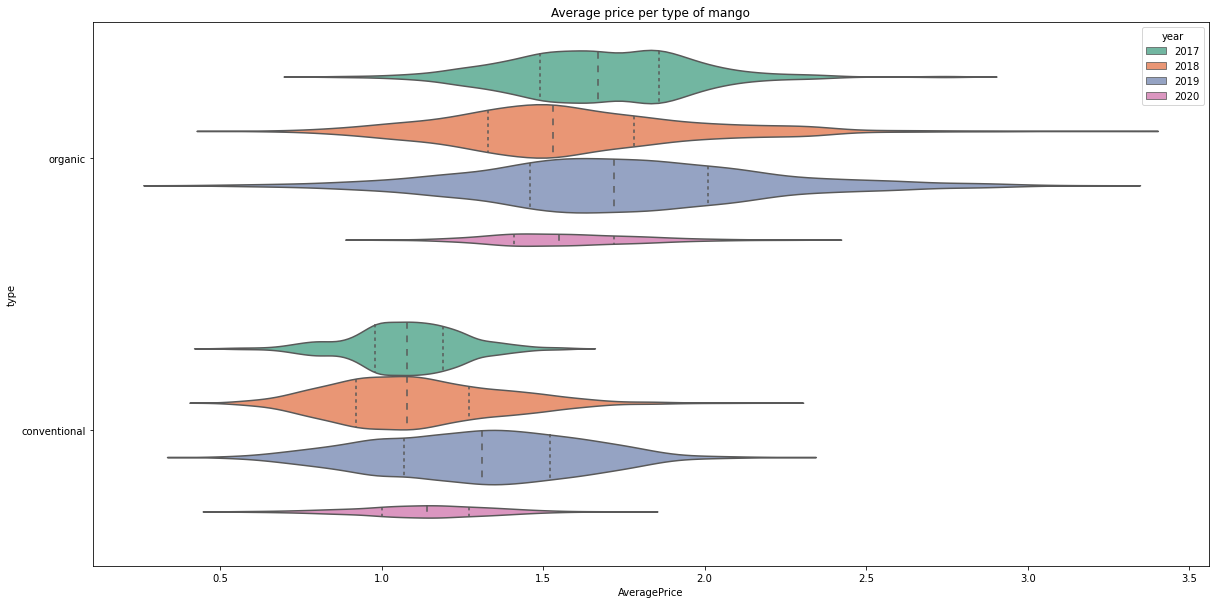

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Average price per type of mango')
sns.violinplot(x = 'AveragePrice', y = 'type', data = df_total, hue = 'year', 
               palette="Set2", scale="count", inner="quartile")

From a first violin plot we could conclude that organic mangos prices are higher. Let's explore a bit further.

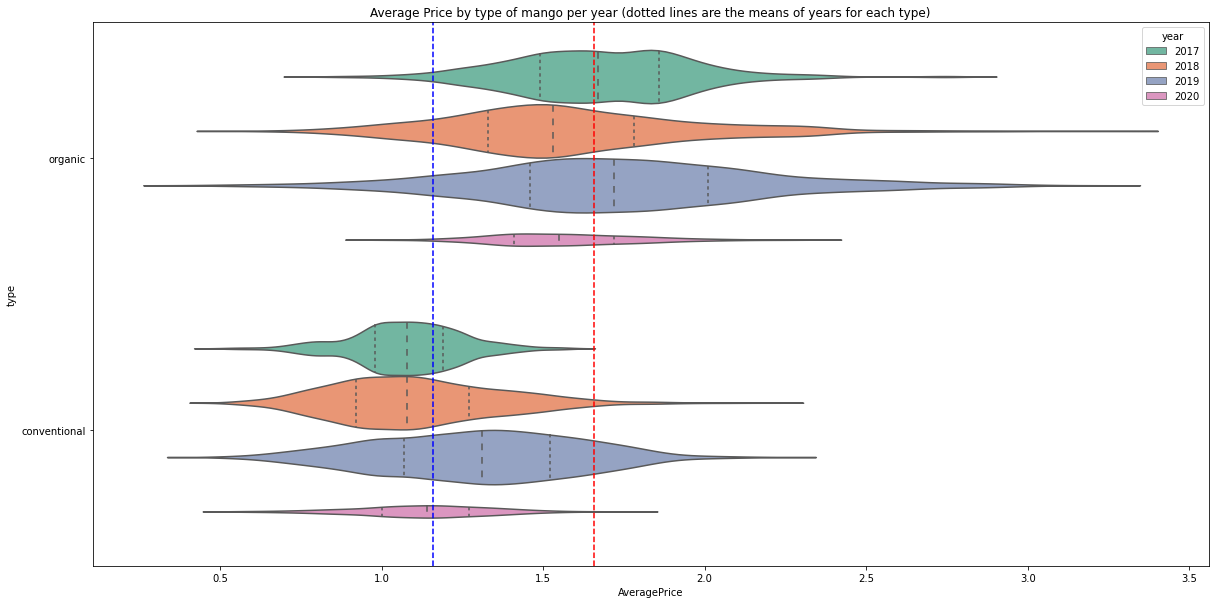

In [ ]:
# Getting the averages of organic and conventional types
morg = df_total.loc[df_total['type'] == 'organic']['AveragePrice'].mean()
mcon = df_total.loc[df_total['type'] == 'conventional']['AveragePrice'].mean()
# Plotting for types and years
plt.figure(figsize = (20,10))
plt.title('Average Price by type of mango per year (dotted lines are the means of years for each type)')
plt.axvline(morg, color = 'r', linestyle = '--')
plt.axvline(mcon, color = 'b', linestyle = '--')
sns.violinplot(x = 'AveragePrice', y = 'type', data = df_total, hue = 'year', 
               palette="Set2", scale="count", inner="quartile")

This first plot shows the average prices of mangos per year and type. It is made with all the data. Since in 2020 we only have 3 months of data, I'll repeat the same process but just with the first 3 months of each year.

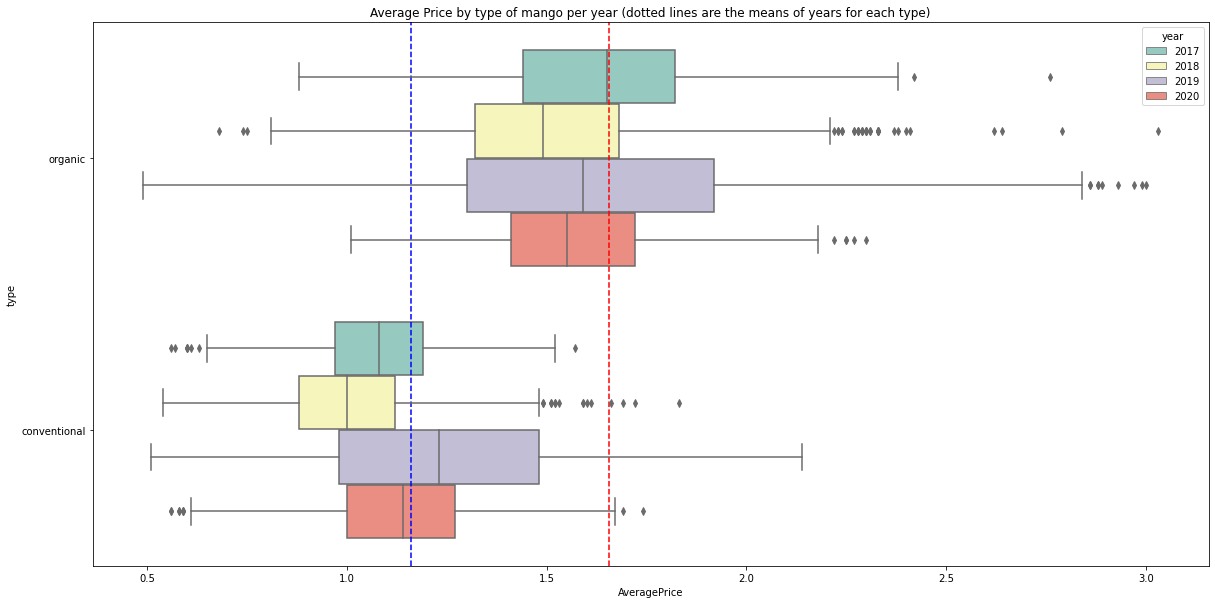

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Average Price by type of mango per year (dotted lines are the means of years for each type)')
plt.axvline(morg, color = 'r', linestyle = '--')
plt.axvline(mcon, color = 'b', linestyle = '--')
sns.boxplot(x = 'AveragePrice', y = 'type', data = df_totalr, hue = 'year', palette = 'Set3')

Although there are some small differences, the answer for our question doesn't change, and we clearly have higher prices for organic mangos than for conventional ones in every year. As the distributions were similar, I chose a boxplot here to clearly see outliers.

# More Insights

### Are prices following a common pattern? What about profits x unit?

First we want to see the evolution of prices in a time series of all our data.

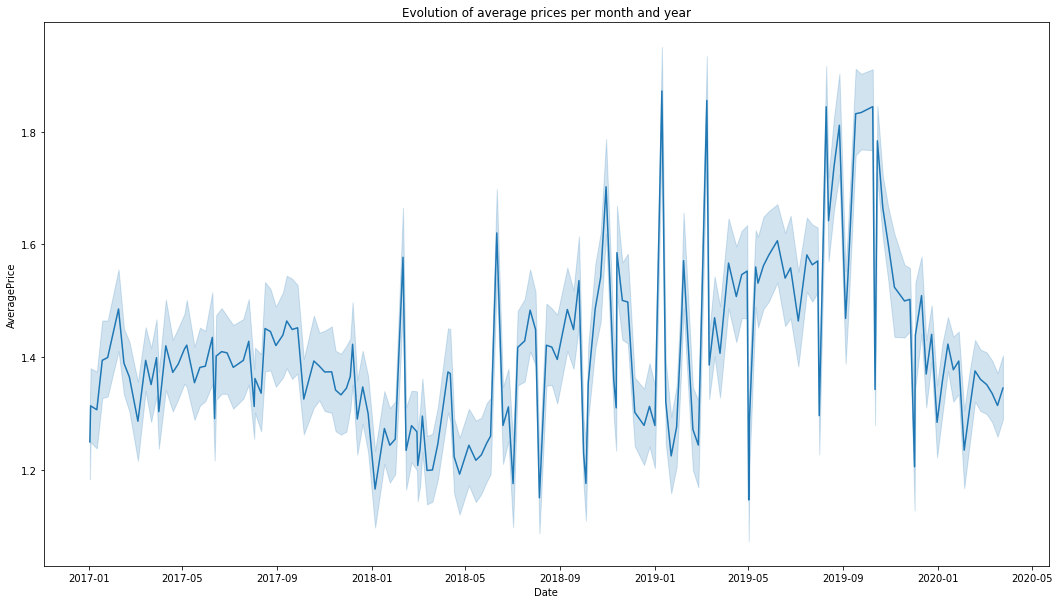

In [ ]:
df_plot = df_total
df_plot['month'] = pd.DatetimeIndex(df_plot['Date']).month
plt.figure(figsize=(18,10))
plt.title('Evolution of average prices per month and year')
sns.lineplot(x='Date', y='AveragePrice', data = df_plot)

Looks like prices in have followed a positive trend.

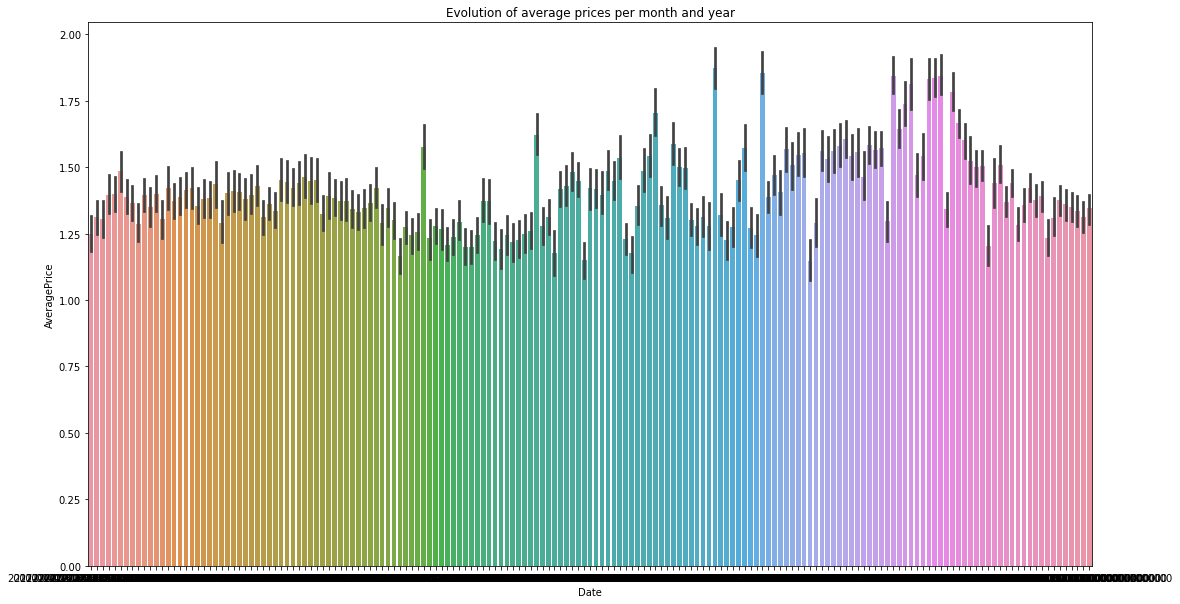

In [ ]:
plt.figure(figsize = (18,10))
plt.title('Evolution of average prices per month and year')
sns.barplot(data = df_plot, x = 'Date', y = 'AveragePrice')

If we look at a barplot, that trend doesn't look as strong as before.

Let's look at it per years.

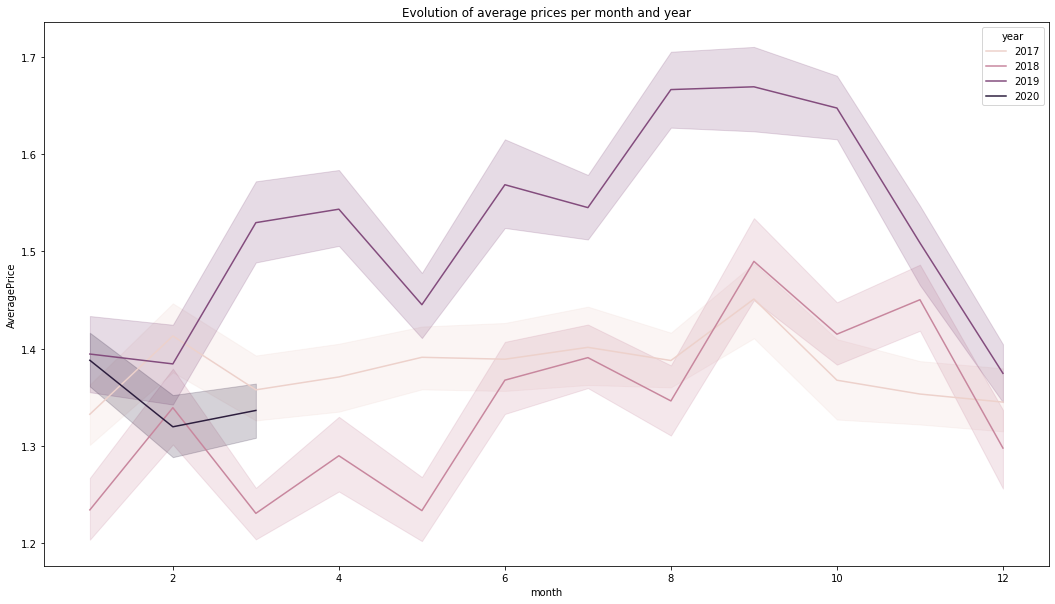

In [ ]:
plt.figure(figsize=(18,10))
plt.title('Evolution of average prices per month and year')
sns.lineplot(x='month', y='AveragePrice', hue = 'year', data = df_plot)

Prices look higher at the last 6 months of the year. Let's explore numerically.

In [ ]:
df_plot.loc[df_plot['month'] >=  6 ].groupby('year').mean()

,AveragePrice,Large Bags,Profitability per unit,Small Bags,Total Volume,Total profitability,Type 4,Type1,Type2,Type3,XLarge Bags,month
year,,,,,,,,,,,,
2017,1.383068,15808.113708,0.995720,72915.618627,482272.068137,391578.397689,89460.956183,178687.568718,197708.375799,16415.167437,737.223848,9.033181
2018,1.397094,35385.142088,1.003060,125651.708428,515939.545399,441206.752472,163412.560343,164752.403060,173437.112789,14337.469208,2375.709827,8.966667
2019,1.563597,42512.341910,1.092198,126864.340481,519704.292835,479265.821300,172137.556161,172860.498228,165387.076963,9315.016193,2760.870938,9.235368


In [ ]:
df_plot.loc[df_plot['month'] <  6].groupby('year').mean()

,AveragePrice,Large Bags,Profitability per unit,Small Bags,Total Volume,Total profitability,Type 4,Type1,Type2,Type3,XLarge Bags,month
year,,,,,,,,,,,,
2017,1.370076,13510.414973,0.966754,70406.891406,513903.727219,410371.435045,84350.192606,211389.699928,202333.125445,15830.709241,432.886226,3.047619
2018,1.262277,42164.337449,0.956181,126961.238443,583637.647804,466747.354691,171251.755806,176785.406355,212504.571201,23095.914443,2126.179914,3.000000
2019,1.455361,46628.463097,1.021241,148382.518142,581620.957039,490375.687194,197527.095172,191267.555029,181337.216181,11488.239532,2516.113523,3.086957
2020,1.348049,60087.755075,0.842317,176614.343934,675904.650393,463271.723259,240185.351904,222496.816947,201887.929528,11329.583950,3483.252895,1.999213


Prices are, on average, a bit higher in 2017, 2018 and 2019 the last 6 months of the year. We cannot compare in 2020 due to the lack of data. Let's see by mango type.

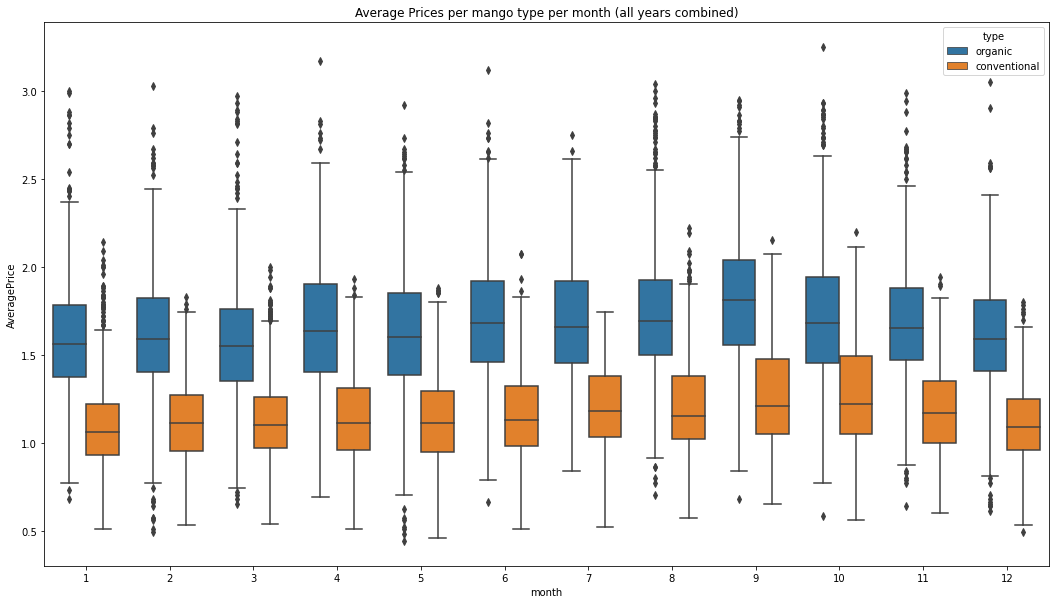

In [ ]:
plt.figure(figsize = (18,10))
plt.title('Average Prices per mango type per month (all years combined)')
sns.boxplot(data = df_plot, x = 'month', y = 'AveragePrice', hue = 'type')

Let´s explore now profitability per unit.

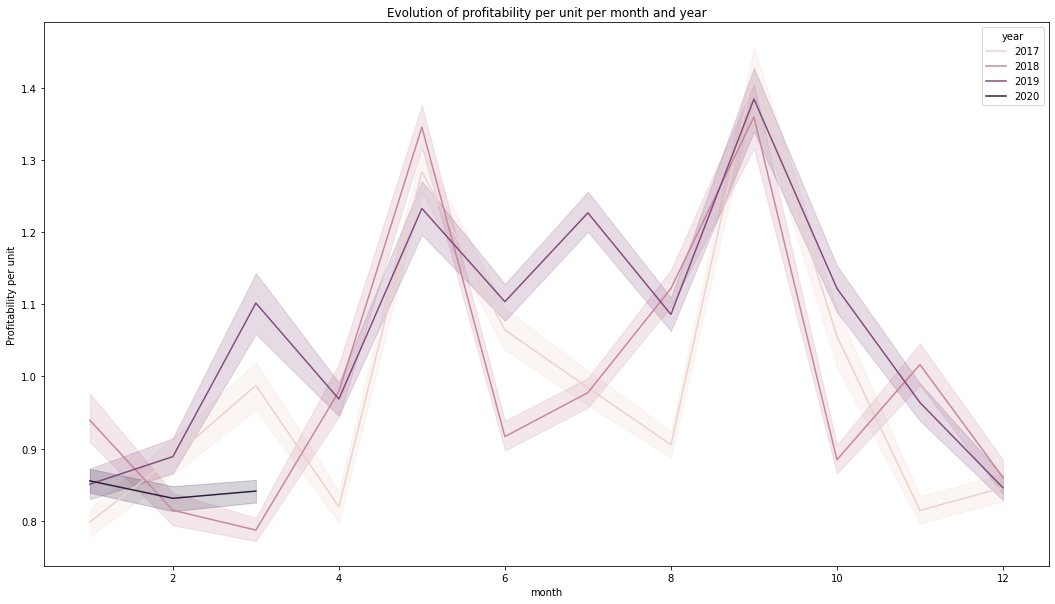

In [ ]:
plt.figure(figsize=(18,10))
plt.title('Evolution of profitability per unit per month and year')
sns.lineplot(x='month', y='Profitability per unit', hue = 'year', data = df_plot)

Graphically, there are 2 months where profits per unit are higher than the rest: May (month 5) and September (month 9).

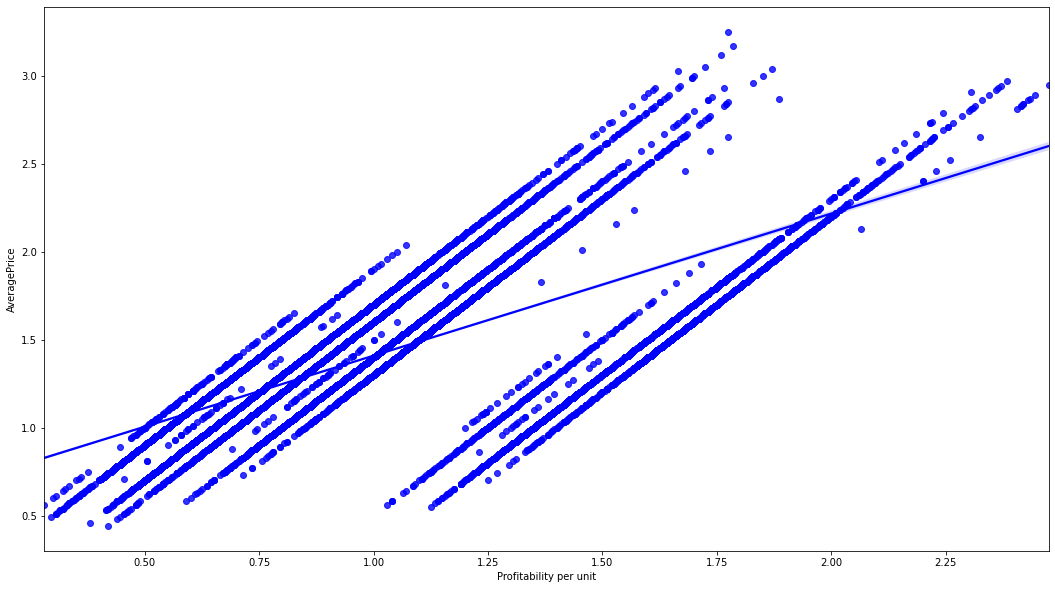

In [ ]:
plt.figure(figsize = (18,10))
sns.regplot(x = 'Profitability per unit', y = 'AveragePrice', data = df_plot, fit_reg = True, color = 'b')

There is a strong correlation between prices and profit per unit. We clearly see two different distributions, that can be explained by the difference in price between organic and conventional mangos.

### Are some regions more profitable than others? Which ones?

I will be using only the first 3 months of each year, to be able to properly compare with 2020.

This analysis will be conducted on a total and per unit basis.

In [ ]:
df_totalr.groupby('region').describe().head(5)

AveragePrice                      ...    year                
                           count      mean       std  ...     50%     75%     max
region                                                ...                        
Albany                     104.0  1.518077  0.300052  ...  2018.0  2019.0  2020.0
Atlanta                    104.0  1.315288  0.387063  ...  2018.0  2019.0  2020.0
BaltimoreWashington        104.0  1.455385  0.269768  ...  2018.0  2019.0  2020.0
Boise                      104.0  1.288077  0.411582  ...  2018.0  2019.0  2020.0
Boston                     104.0  1.526538  0.333384  ...  2018.0  2019.0  2020.0

[5 rows x 96 columns]

In [ ]:
reg_tprofit = df_totalr.groupby('region').mean()['Total profitability']
reg_uprofit = df_totalr.groupby('region').mean()['Profitability per unit']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

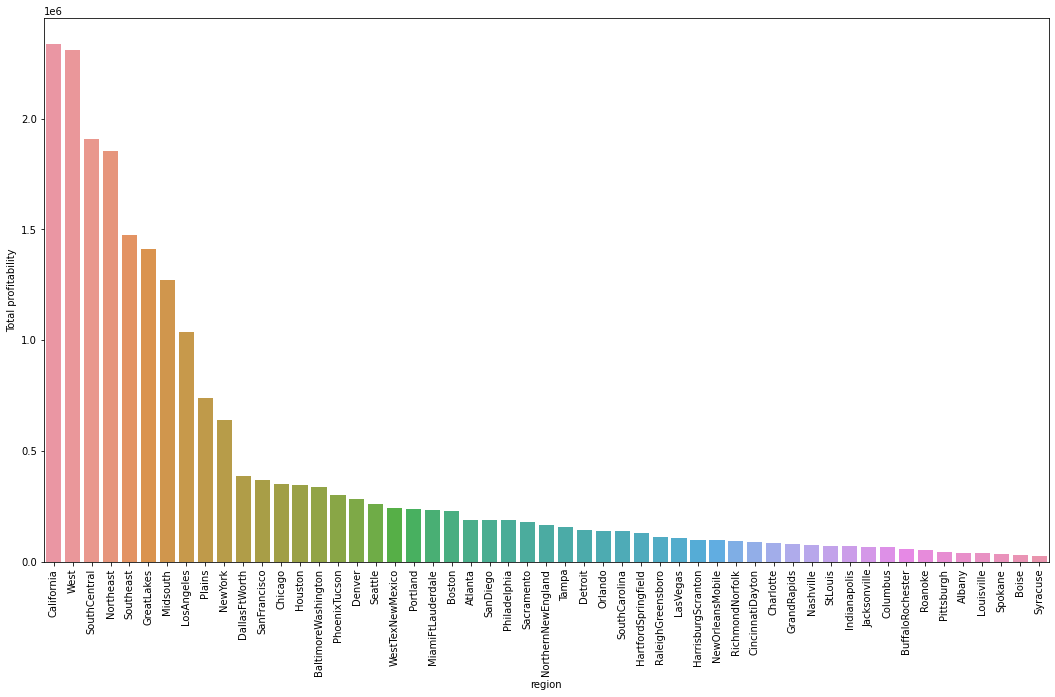

In [ ]:
df_reg = pd.DataFrame(reg_tprofit)
df_reg['region'] = df_reg.index
df_reg.sort_values(by = 'Total profitability', inplace = True, ascending= False)
plt.figure(figsize=(18,10))
sns.barplot(data = df_reg, x = 'region', y = 'Total profitability')
plt.xticks(rotation=90)

From visual analysis, we see that total profitability hugely increases from DallasFtWorth onwards. These are those regions:

In [ ]:
mprofit = df_reg.loc[df_reg['Total profitability'] > df_reg['Total profitability']['DallasFtWorth']].drop('region', axis = 1)
mprofit

,Total profitability
region,
California,2.337239e+06
West,2.307857e+06
SouthCentral,1.910413e+06
Northeast,1.852172e+06
Southeast,1.476786e+06
GreatLakes,1.412314e+06
Midsouth,1.270237e+06
LosAngeles,1.036760e+06
Plains,7.388883e+05


In [ ]:
round((mprofit.sum())/(df_reg.drop("region", axis=1).sum())*100)

Total profitability    69.0
dtype: float64

In [ ]:
#Just to now fast the total number of regions
df_total.groupby("region").describe().head() # I put head not to have a big 
# thing, just take it out and you know the number of rows (#regions)

AveragePrice                            ... month                
                           count      mean       std   min  ...   25%  50%  75%   max
region                                                      ...                      
Albany                     338.0  1.561036  0.291986  0.85  ...   3.0  6.0  9.0  12.0
Atlanta                    338.0  1.337959  0.398297  0.62  ...   3.0  6.0  9.0  12.0
BaltimoreWashington        338.0  1.534231  0.299428  0.95  ...   3.0  6.0  9.0  12.0
Boise                      338.0  1.348136  0.457911  0.58  ...   3.0  6.0  9.0  12.0
Boston                     338.0  1.530888  0.328074  0.85  ...   3.0  6.0  9.0  12.0

[5 rows x 104 columns]

In fact, only from those 10 regions come the 69% of the total profit. The other 31% comes from the rest 43 regions.

In [ ]:
umean = reg_uprofit.mean()

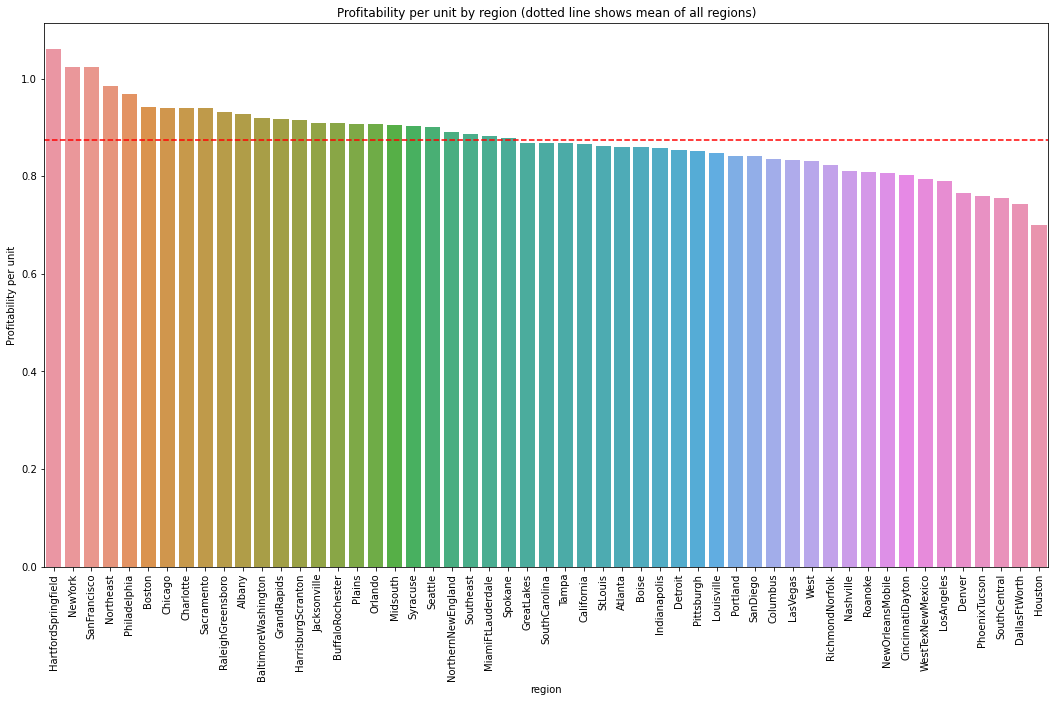

In [ ]:
df_reg = pd.DataFrame(reg_uprofit)
df_reg['region'] = df_reg.index
df_reg.sort_values(by = 'Profitability per unit', inplace = True, ascending= False)
plt.figure(figsize=(18,10))
plt.title('Profitability per unit by region (dotted line shows mean of all regions)')
sns.barplot(data = df_reg, x = 'region', y = 'Profitability per unit')
plt.xticks(rotation=90)
plt.axhline(umean, color = 'r', linestyle = '--')

There are some regions with higher profitability per unit than others.

Here are the regions with profitability per unit above the average:

In [ ]:
df_reg.loc[df_reg['Profitability per unit'] > umean].drop('region', axis = 1)

,Profitability per unit
region,
HartfordSpringfield,1.060625
NewYork,1.023365
SanFrancisco,1.023317
Northeast,0.985577
Philadelphia,0.967933
Boston,0.942115
Chicago,0.939519
Charlotte,0.938942
Sacramento,0.938894


### It's the total_profitability dependant on the size of the bags?

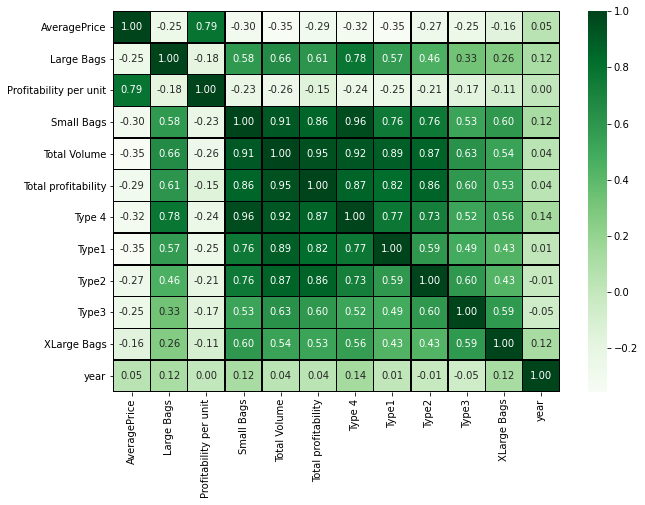

In [ ]:
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(df_totalr.corr(), annot = True, cmap = 'Greens', 
            linewidths = 0.5, linecolor = 'black',
            fmt = '.2f', ax = ax)

Looks like there exist a positive relationship between total profit and small bags. Not with the other types.

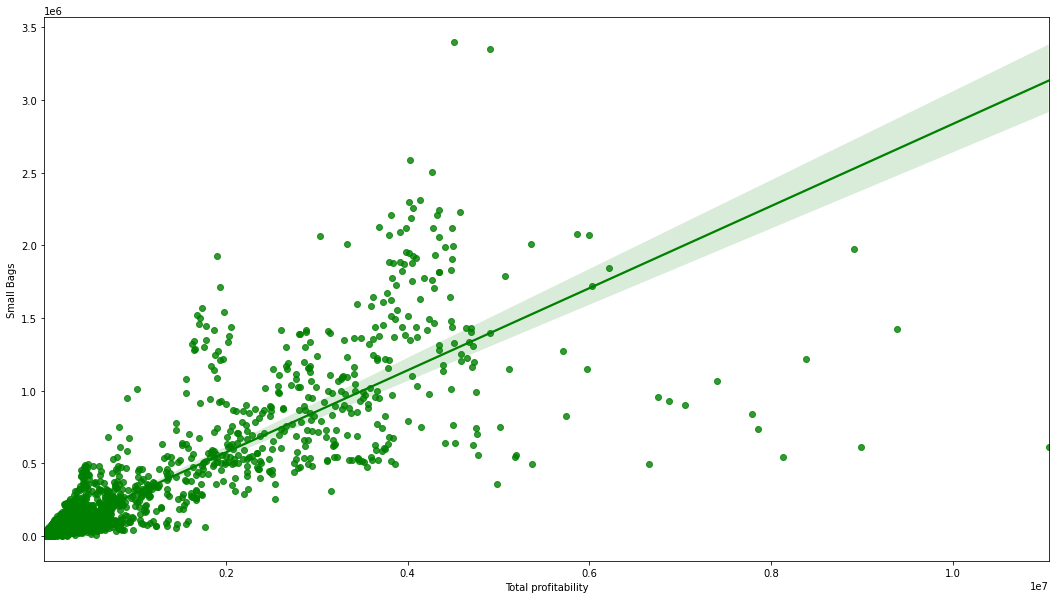

In [ ]:
plt.figure(figsize = (18,10))
sns.regplot(x = 'Total profitability', y = 'Small Bags', data = df_totalr, fit_reg = True, color = 'g')

So, the higher the number of small bags bought, the higher the total profitability. That could be explained beacause mangos total profitability is highly dependant on minorist sellings.

### It's the procedence of the product affecting to the profit x unit? And what about the type of mango?

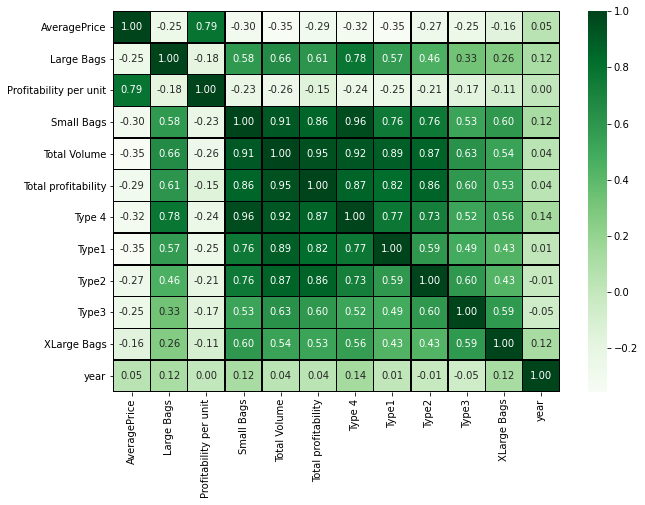

In [ ]:
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(df_totalr.corr(), annot = True, cmap = 'Greens', 
            linewidths = 0.5, linecolor = 'black',
            fmt = '.2f', ax = ax)

We can conclude from the correlations above that the origin of the mango does not affect profitability per unit.

By type of mango:

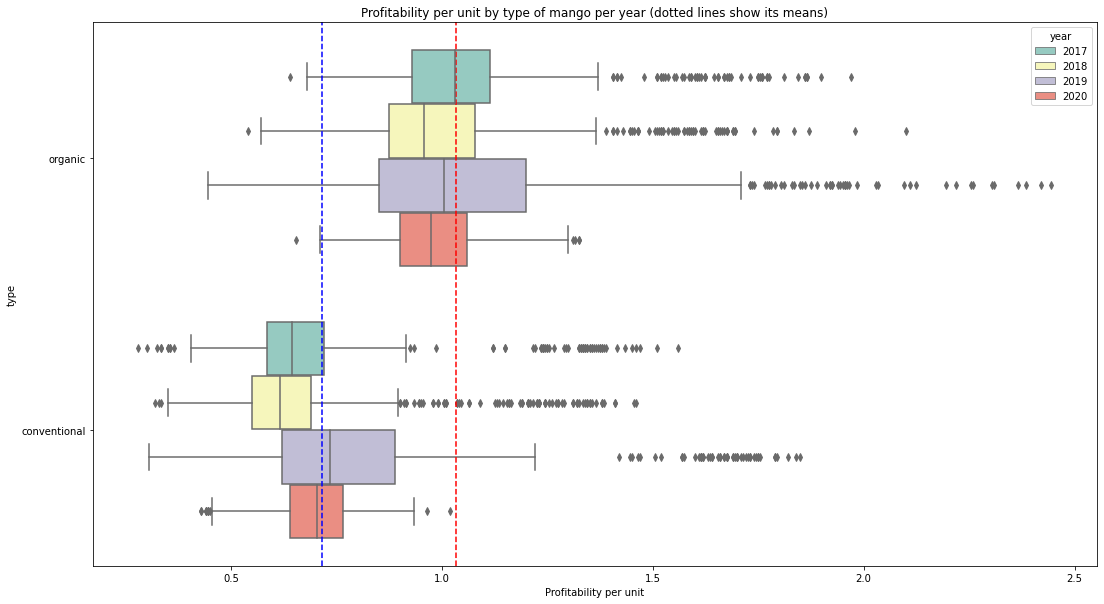

In [ ]:
orgmean = df_totalr.loc[df_totalr['type'] == 'organic']['Profitability per unit'].mean()
conmean = df_totalr.loc[df_totalr['type'] == 'conventional']['Profitability per unit'].mean()
plt.figure(figsize = (18,10))
plt.title('Profitability per unit by type of mango per year (dotted lines show its means)')
sns.boxplot(x = 'Profitability per unit', y = 'type', data = df_totalr, hue = 'year', palette = 'Set3')
plt.axvline(orgmean, color = 'r', linestyle = '--')
plt.axvline(conmean, color = 'b', linestyle = '--')

We can conclude that there is definetely a relation between organic mangos having greater profitability per unit than conventional ones.

# Conslusions

We can firmly conclude several things. First of all, prices were higher in 2019 compared to 2020. Also, organic products show a higher price and profitability than conventional ones, not only globally, but also every year. Prices also seem to be higher the second part of the year (from June onwards). Specially between September and October. Profits achieve it´s highest in May and September, and there seems to be correlation between profits per unit and prices. Profits come mainly from a few regions, out of 53 regions, 69% of the profit comes just from 10 regions. Also, profitability per unit is higher in some regions, but it is not a great difference on average.